This is our wine analysis

In [34]:
library(tidyverse)
library(digest)
library(repr)
library(caret)

In [35]:
white_wine <- read_delim(file = "data/wine_quality_white.csv", delim = ";", col_names = TRUE)

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_integer()
)


In [36]:
red_wine <- read_delim(file = "data/wine_quality_red.csv", delim = ";", col_names = TRUE)

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_integer(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_integer()
)
Warning message:
“2 parsing failures.
row # A tibble: 2 x 5 col     row col                expected              actual file                    expected   <int> <chr>              <chr>                 <chr>  <chr>                   actual 1  1296 total sulfur diox… no trailing characte… .5     'data/wine_quality_red… file 2  1297 total sulfur diox… no trailing characte… .5     'data/wine_quality_red…
”

In [37]:
head(red_wine)

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [38]:
red_wine_mean  <- red_wine  %>% select(-quality) %>% colMeans()
head(red_wine_mean)

fixed acidity    volatile acidity         citric acid      residual sugar 
         8.31963727          0.52782051          0.27097561          2.53880550 
          chlorides free sulfur dioxide 
         0.08746654         15.87492183

In [39]:
white_wine_mean  <- white_wine  %>% select(-quality)  %>% colMeans()
white_wine_mean

fixed acidity     volatile acidity          citric acid 
          6.85478767           0.27824112           0.33419151 
      residual sugar            chlorides  free sulfur dioxide 
          6.39141486           0.04577236          35.30808493 
total sulfur dioxide              density                   pH 
        138.36065741           0.99402738           3.18826664 
           sulphates              alcohol 
          0.48984688          10.51426705

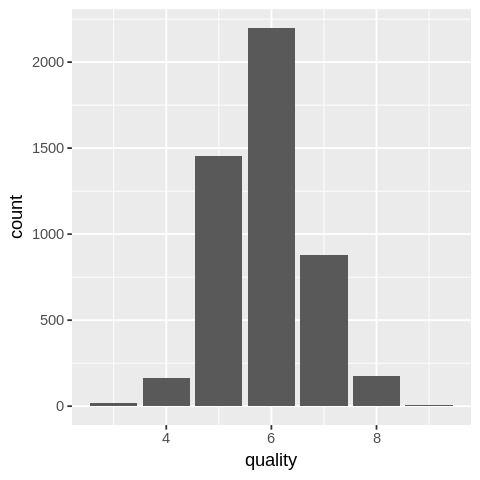

In [40]:

options(repr.plot.height = 4, repr.plot.width = 4)
white_wine_bar_chart  <- white_wine  %>% ggplot(aes(x = quality))+
                    geom_bar()
white_wine_bar_chart

In [41]:
glimpse(white_wine)

Observations: 4,898
Variables: 12
$ `fixed acidity`        <dbl> 7.0, 6.3, 8.1, 7.2, 7.2, 8.1, 6.2, 7.0, 6.3,...
$ `volatile acidity`     <dbl> 0.27, 0.30, 0.28, 0.23, 0.23, 0.28, 0.32, 0....
$ `citric acid`          <dbl> 0.36, 0.34, 0.40, 0.32, 0.32, 0.40, 0.16, 0....
$ `residual sugar`       <dbl> 20.70, 1.60, 6.90, 8.50, 8.50, 6.90, 7.00, 2...
$ chlorides              <dbl> 0.045, 0.049, 0.050, 0.058, 0.058, 0.050, 0....
$ `free sulfur dioxide`  <dbl> 45, 14, 30, 47, 47, 30, 30, 45, 14, 28, 11, ...
$ `total sulfur dioxide` <dbl> 170, 132, 97, 186, 186, 97, 136, 170, 132, 1...
$ density                <dbl> 1.0010, 0.9940, 0.9951, 0.9956, 0.9956, 0.99...
$ pH                     <dbl> 3.00, 3.30, 3.26, 3.19, 3.19, 3.26, 3.18, 3....
$ sulphates              <dbl> 0.45, 0.49, 0.44, 0.40, 0.40, 0.44, 0.47, 0....
$ alcohol                <dbl> 8.8, 9.5, 10.1, 9.9, 9.9, 10.1, 9.6, 8.8, 9....
$ quality                <int> 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 7, 5,...


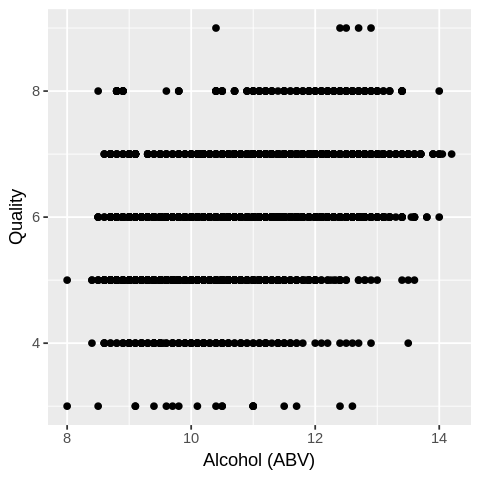

In [42]:
white_wine_plot  <- white_wine  %>% ggplot(aes(x = alcohol, y = quality))+ 
                    geom_point()+
                    xlab("Alcohol (ABV)")+
                    ylab("Quality")
white_wine_plot

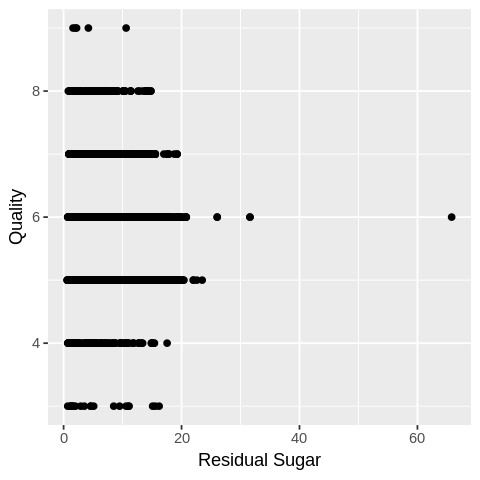

In [43]:
white_wine_plot_sugar  <- white_wine  %>% ggplot(aes(x = `residual sugar`, y = quality))+ 
                    geom_point()+
                    xlab("Residual Sugar")+
                    ylab("Quality")
white_wine_plot_sugar

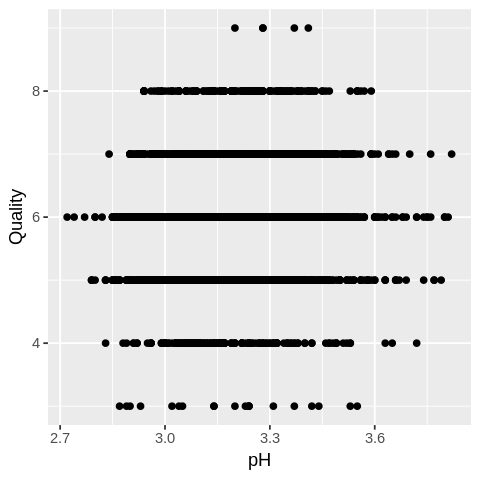

In [44]:
white_wine_plot_pH  <- white_wine  %>% ggplot(aes(x = pH, y = quality))+ 
                    geom_point()+
                    xlab("pH")+
                    ylab("Quality")
white_wine_plot_pH

In [45]:
ph_range  <- white_wine  %>% select(pH)  %>%  range()
ph_range

[1] 2.72 3.82

In [49]:
ph_range_red <- red_wine  %>% select(pH)  %>% range()
ph_range_red

[1] 2.74 4.01

In [47]:
glimpse(red_wine)

Observations: 1,599
Variables: 12
$ `fixed acidity`        <dbl> 7.4, 7.8, 7.8, 11.2, 7.4, 7.4, 7.9, 7.3, 7.8...
$ `volatile acidity`     <dbl> 0.700, 0.880, 0.760, 0.280, 0.700, 0.660, 0....
$ `citric acid`          <dbl> 0.00, 0.00, 0.04, 0.56, 0.00, 0.00, 0.06, 0....
$ `residual sugar`       <dbl> 1.9, 2.6, 2.3, 1.9, 1.9, 1.8, 1.6, 1.2, 2.0,...
$ chlorides              <dbl> 0.076, 0.098, 0.092, 0.075, 0.076, 0.075, 0....
$ `free sulfur dioxide`  <dbl> 11, 25, 15, 17, 11, 13, 15, 15, 9, 17, 15, 1...
$ `total sulfur dioxide` <int> 34, 67, 54, 60, 34, 40, 59, 21, 18, 102, 65,...
$ density                <dbl> 0.9978, 0.9968, 0.9970, 0.9980, 0.9978, 0.99...
$ pH                     <dbl> 3.51, 3.20, 3.26, 3.16, 3.51, 3.51, 3.30, 3....
$ sulphates              <dbl> 0.56, 0.68, 0.65, 0.58, 0.56, 0.56, 0.46, 0....
$ alcohol                <dbl> 9.4, 9.8, 9.8, 9.8, 9.4, 9.4, 9.4, 10.0, 9.5...
$ quality                <int> 5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5,...


In [51]:
acidity_red  <- red_wine  %>% select(`fixed acidity`)  %>% range()
acidity_red

[1]  4.6 15.9